# Homework 2

## Lectures 3-4



### Hoeffding Inequality

Run a computer simulation for flipping $1000$ virtual fair coins.

Flip each coin independently $10$ times.

Focus on 3 coins as follows:
* $c_1$ is the first coin flipped,
* $c_{rand}$ is a coin chosen randomly from the $1000$,
* and $c_{min}$ is the coin which had the minimum frequency of heads (pick the earlier one in case of a tie).

Let $ν_{1}$, $ν_{rand}$, and $ν_{min}$ be the fraction of heads obtained for the 3 respective coins out of the $10$ tosses.

Run the experiment $100000$ times in order to get a full distribution of $ν_1$, $ν_{rand}$, and $ν_{min}$ (note that $c_{rand}$ and $c_{min}$ will change from run to run).

In [23]:
flip_coin <- function(tosses=10){
    return(rbinom(tosses, 1, prob=0.5))
}

In [118]:
flip_k_coins <- function(k=1000, tosses=10){
    # Coin x Toss
    experiment <- matrix(0, nrow=k, ncol=tosses)
    # Run k experiments
    for(i in c(1:k)){
        experiment[i,] <- flip_coin(tosses)
    }
    # Freq of head for 1st coin
    v_1 <- sum(experiment[1,])/10
    # Freq of head for a random coin
    r_idx  <- sample(c(1:k), size=1)
    v_rand <- sum(experiment[r_idx,])/10
    # Freq of head for min freq head coin
    min_idx <- which.min(rowSums(experiment))
    v_min   <- sum(experiment[min_idx,])/10
    
    return(c(v_1, v_rand, v_min))
}

In [130]:
print("v_1, v_rand, v_min")
flip_k_coins(k=1000, tosses=10)

[1] "v_1, v_rand, v_min"


[1] 0,6 0,7 0,0

In [138]:
run_n_experiments <- function(n=10^5){
    experiments <- matrix(0, nrow=n, ncol=3)
    for(i in c(1:n)){
        experiments[i,] <- flip_k_coins(k=1000, tosses=10)
    }
    return(experiments)
}

In [139]:
data <- run_n_experiments(n=10^5)

[1] 1e+05

In [143]:
#mean(v_min)
mean_v <- mean(data[,3])
mean_v

[1] 0,03757

### 1. The average value of ν min is closest to:
* **\[a\]** 0
* **\[b\]** 0.01
* **\[c\]** 0.1
* **\[d\]** 0.5
* **\[e\]** 0.67

### Solution

In [144]:
abs(mean_v - 0)
abs(mean_v - 0.01)
abs(mean_v - 0.1)
abs(mean_v - 0.5)
abs(mean_v - 0.67)

[1] 0,03757

[1] 0,02757

[1] 0,06243

[1] 0,46243

[1] 0,63243

### Answer

> The closest value for $\nu$ is 
>
>>**\[b\] 0.01**

### 2. Which coin(s) has a distribution of $\nu$ that satisfies the (single-bin) Hoeffding Inequality?

* **\[a\]** $c_1$ only
* **\[b\]** $c_{rand}$ only
* **\[c\]** $c_{min}$ only
* **\[d\]** $c_1$ and $c_{rand}$
* **\[e\]** $c_{min}$ and $c_{rand}$

### Solution

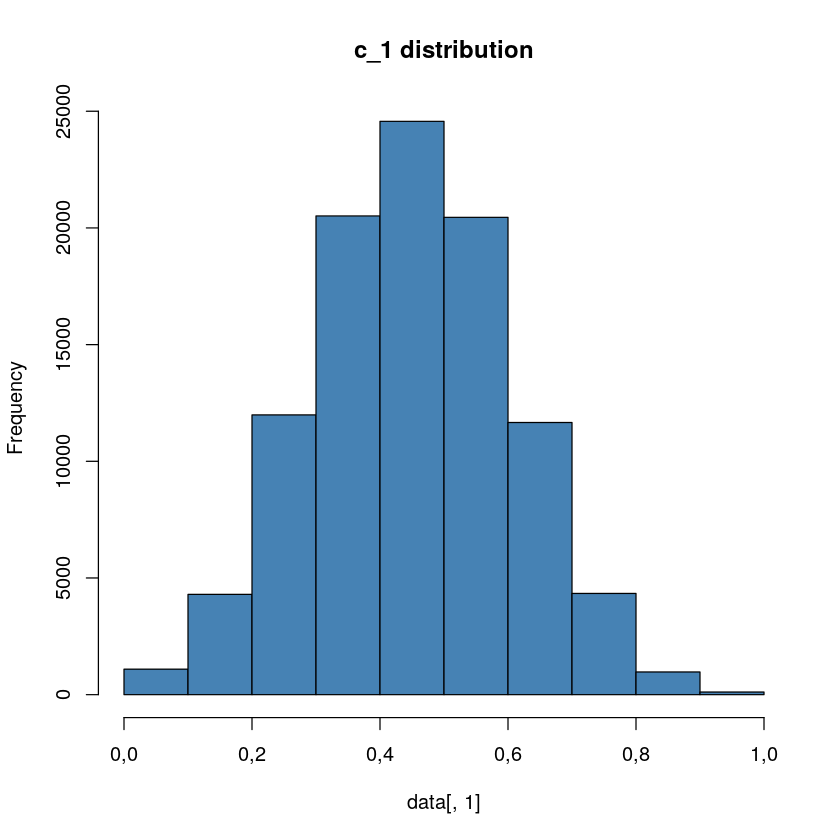

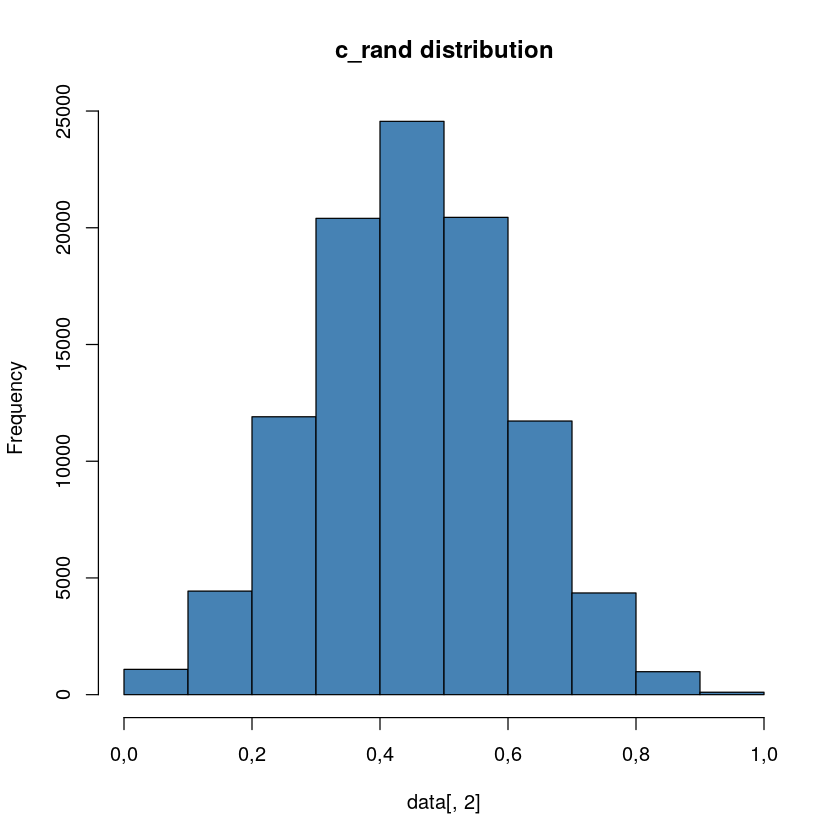

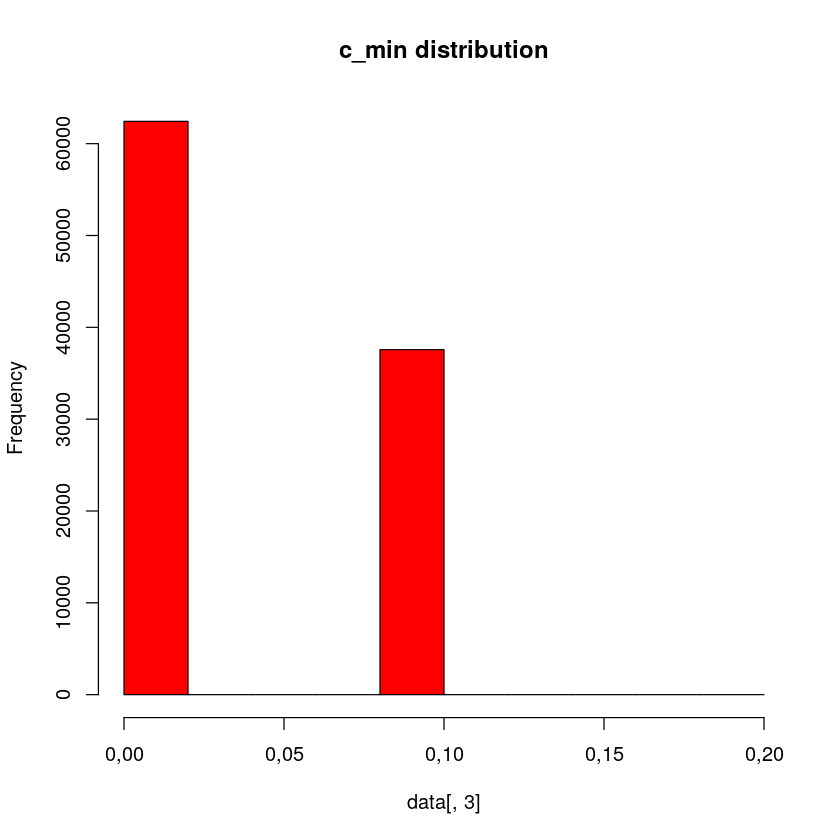

In [168]:
hist(data[,1], main="c_1 distribution", col='steelblue', breaks=14)
hist(data[,2], main="c_rand distribution", col='steelblue', breaks=14)
hist(data[,3], main="c_min distribution", col='red', breaks=14)

### Answer

> Only $c_1$ and $c_{rand}$ satisfies the single-bin Hoeffding Inequality
>
>>**\[d\]** $c_1$ and $c_{rand}$

## Error and Noise

Consider the bin model for a hypothesis h that makes an error with probability μ in approximating a deterministic target function f (both h and f are binary functions).

If we use the same h to approximate a noisy version of f given by:

$$\large P(y|x) = \begin{cases} 
      \lambda & y = f(x) \\
      1-\lambda & y \neq f(x)
   \end{cases}
$$

3. What is the probability of error that h makes in approximating y?

   *Hint: Two wrongs can make a right!*

* **\[a\]** μ
* **\[b\]** λ
* **\[c\]** 1-μ
* **\[d\]** (1 − λ) ∗ μ + λ ∗ (1 − μ)
* **\[e\]** (1 − λ) ∗ (1 − μ) + λ ∗ μ

### Solution

In the first case

> $\text{"error"} \equiv h(x) \neq f(x)$

So:

>$$P[ h(x) \neq f(x) ] = \mu$$
>
>$$P[ h(x) = f(x) ] = 1-\mu$$

If we use the same h to approximate a noisy version of f (by [Law of Total Probability](https://en.wikipedia.org/wiki/Law_of_total_probability))

>$$P[ h(x) \neq y ] = (\mu * P[y=f(x)]) + ((1-\mu) * P[y \neq f(x)])$$
>
>$$P[ h(x) \neq y ] = (\mu * \lambda) + ((1-\mu) * (1-\lambda))$$
>
>$$\large P\left[ h(x) \neq y \right] = \mu \lambda + (1-\mu) (1-\lambda)$$

### Answer

> The probability of error that h makes in approximating y is 
>
>>**\[e\]** $\mu \lambda + (1-\mu) (1-\lambda)$

### 4. At what value of λ will the performance of h be independent of μ?

* **\[a\]** 0
* **\[b\]** 0.5
* **\[c\]** 1/ √2
* **\[d\]** 1
* **\[e\]** No values of λ

### Solution


We know from 3. that
> $P\left[ h(x) \neq y \right] = \mu \lambda + (1-\mu) (1-\lambda)$

We want to see if for some value of $\lambda$, $\mu$ dissapears from that equation:

For $\lambda = 0$:
> $P\left[ h(x) \neq y \right] = 1-\mu$

For $\lambda = 0.5$:
> $P\left[ h(x) \neq y \right] = 0.5\mu + 0.5(1-\mu)$
>
> $P\left[ h(x) \neq y \right] = 0.5\mu - 0.5\mu + 0.5$
>
> $P\left[ h(x) \neq y \right] = 0.5$

For the other values it always depends on $\mu$.

**Note:** Intuitively, is reasonable to think that if $P(y|x)$ is random with equal probabilty for each possible y, then whichever h we have, no matter the rate of error $\mu$ over f, it always will make the same amount of error: half right, half wrong, randomly.

### Answer:

> For $\lambda = 0.5$ the performance of h will be independent of μ
>
>>**\[b\]** 0.5